In [6]:
import pandas as pd
import pickle
from Bio.Seq import Seq
from collections import OrderedDict
import logomaker
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In the first step compute the trinucleotide and single nucleotide mutation rates per sample for each of the timeframes.

In [7]:
def get_single_and_trinucleotide_mutation_rates_per_sample_per_timerame(folder_path, n_months, sample_size, mutation_types):
    """Computes and Returns the single and trinucleotide mutation rates per sample, separately for all the timeframes
    
        Parameters:
            - folder_path (str): Contains the path to the subdirectories to each sample
            - n_months (int): No of months in each time frame
            - sample_size (int): No of Genomes in each sample
            - mutation_types (list): A list of all the mutation types whose values are to be computed
        Returns:
            - single_nucleotide_mutation_rates_per_time_period_for_all_samples (nested dictionary): A dictionary containing the single nucleotide mutation rates per time frame for each of the sample
            - trinucleotide_mutation_rates_per_time_period_for_all_samples (nested dictionary): A dictionary containing the trinucleotide mutation rates per time frame for each of the sample
            - time_periods (list): A list containing the different timeframes
    """   

    # For storing mutation rates for all the samples across the different timeframes
    single_nucleotide_mutation_rates_per_time_period_for_all_samples={}
    trinucleotide_mutation_rates_per_time_period_for_all_samples={}

    # Iterate through each sample
    for sample in sorted(os.listdir(folder_path), key=lambda x: int(x.split("_")[1])):
        # Allocate the Sample name to the nested dictionary object
        single_nucleotide_mutation_rates_per_time_period_for_all_samples[sample]={}
        trinucleotide_mutation_rates_per_time_period_for_all_samples[sample]={}
        
        # We load the metadata file of the sampled genomes for this sample
        sampled_genomes_metadata_df=pd.read_csv(os.path.join(folder_path, sample, f"SARS-CoV-2_{sample}_{sample_size}+1_metadata.csv"))

        # Load the de novo mutation data for this sample 
        with open(os.path.join(folder_path, sample, f"SARS-CoV-2_{sample}_denovo_mutations_in_sampled_genomes.pkl"), 'rb') as file:
            denovo_mutation_data = pickle.load(file)
            
        # We extract the different time periods from the metadata and sort them based on the date
        time_periods=sorted(list(set(sampled_genomes_metadata_df[f"{n_months}_Month_Period"].to_list())))

        # We iterate through each time period
        for time_period in time_periods:
            # Allocate the time frame under this timeframe in the nested dictionary
            single_nucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period]={}

            # Allocate the different mutation types with counts of 0, this will be used to store the mutation rate values for this timeframe
            for mutation_type in mutation_types:
                single_nucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period][mutation_type]=0

            # Initialize the dictionary to store the trinucleotide mutation rates for the different mutation types
            trinucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period]={'CCC': {'T': 0, 'G': 0, 'A': 0}, 'CCT': {'T': 0, 'G': 0, 'A': 0}, 'CCG': {'T': 0, 'G': 0, 'A': 0}, 'CCA': {'T': 0, 'G': 0, 'A': 0}, 'TCC': {'T': 0, 'G': 0, 'A': 0}, 'TCT': {'T': 0, 'G': 0, 'A': 0}, 'TCG': {'T': 0, 'G': 0, 'A': 0}, 'TCA': {'T': 0, 'G': 0, 'A': 0}, 'GCC': {'T': 0, 'G': 0, 'A': 0}, 'GCT': {'T': 0, 'G': 0, 'A': 0}, 'GCG': {'T': 0, 'G': 0, 'A': 0}, 'GCA': {'T': 0, 'G': 0, 'A': 0}, 'ACC': {'T': 0, 'G': 0, 'A': 0}, 'ACT': {'T': 0, 'G': 0, 'A': 0}, 'ACG': {'T': 0, 'G': 0, 'A': 0}, 'ACA': {'T': 0, 'G': 0, 'A': 0}, 'CTC': {'C': 0, 'G': 0, 'A': 0}, 'CTT': {'C': 0, 'G': 0, 'A': 0}, 'CTG': {'C': 0, 'G': 0, 'A': 0}, 'CTA': {'C': 0, 'G': 0, 'A': 0}, 'TTC': {'C': 0, 'G': 0, 'A': 0}, 'TTT': {'C': 0, 'G': 0, 'A': 0}, 'TTG': {'C': 0, 'G': 0, 'A': 0}, 'TTA': {'C': 0, 'G': 0, 'A': 0}, 'GTC': {'C': 0, 'G': 0, 'A': 0}, 'GTT': {'C': 0, 'G': 0, 'A': 0}, 'GTG': {'C': 0, 'G': 0, 'A': 0}, 'GTA': {'C': 0, 'G': 0, 'A': 0}, 'ATC': {'C': 0, 'G': 0, 'A': 0}, 'ATT': {'C': 0, 'G': 0, 'A': 0}, 'ATG': {'C': 0, 'G': 0, 'A': 0}, 'ATA': {'C': 0, 'G': 0, 'A': 0}, 'CGC': {'C': 0, 'T': 0, 'A': 0}, 'CGT': {'C': 0, 'T': 0, 'A': 0}, 'CGG': {'C': 0, 'T': 0, 'A': 0}, 'CGA': {'C': 0, 'T': 0, 'A': 0}, 'TGC': {'C': 0, 'T': 0, 'A': 0}, 'TGT': {'C': 0, 'T': 0, 'A': 0}, 'TGG': {'C': 0, 'T': 0, 'A': 0}, 'TGA': {'C': 0, 'T': 0, 'A': 0}, 'GGC': {'C': 0, 'T': 0, 'A': 0}, 'GGT': {'C': 0, 'T': 0, 'A': 0}, 'GGG': {'C': 0, 'T': 0, 'A': 0}, 'GGA': {'C': 0, 'T': 0, 'A': 0}, 'AGC': {'C': 0, 'T': 0, 'A': 0}, 'AGT': {'C': 0, 'T': 0, 'A': 0}, 'AGG': {'C': 0, 'T': 0, 'A': 0}, 'AGA': {'C': 0, 'T': 0, 'A': 0}, 'CAC': {'C': 0, 'T': 0, 'G': 0}, 'CAT': {'C': 0, 'T': 0, 'G': 0}, 'CAG': {'C': 0, 'T': 0, 'G': 0}, 'CAA': {'C': 0, 'T': 0, 'G': 0}, 'TAC': {'C': 0, 'T': 0, 'G': 0}, 'TAT': {'C': 0, 'T': 0, 'G': 0}, 'TAG': {'C': 0, 'T': 0, 'G': 0}, 'TAA': {'C': 0, 'T': 0, 'G': 0}, 'GAC': {'C': 0, 'T': 0, 'G': 0}, 'GAT': {'C': 0, 'T': 0, 'G': 0}, 'GAG': {'C': 0, 'T': 0, 'G': 0}, 'GAA': {'C': 0, 'T': 0, 'G': 0}, 'AAC': {'C': 0, 'T': 0, 'G': 0}, 'AAT': {'C': 0, 'T': 0, 'G': 0}, 'AAG': {'C': 0, 'T': 0, 'G': 0}, 'AAA': {'C': 0, 'T': 0, 'G': 0}}
            
            # We extract the genomes in each timeframe
            sampled_genomes_df_time_period=sampled_genomes_metadata_df[sampled_genomes_metadata_df[f"{n_months}_Month_Period"]==time_period]
            
            # Iterate through each of the genomes in this timeframe            
            for genome in set(sampled_genomes_df_time_period["Accession"]):
                # Iterate through each mutation in this genome
                for mutation in denovo_mutation_data[genome]:
                    # Generate the mutation type for this mutation
                    mutation_type=mutation[0][0]+"->"+mutation[0][-1]
                    
                    # record mutation rates only for the selected mutation types that are mentioned by the user
                    if(mutation_type in mutation_types):
                        # update the single nucleotide mutation rate dictionary for this timeframe and sample  
                        single_nucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period][mutation_type] += 1/len(sampled_genomes_df_time_period)
                    # update the trinucleotide mutation rate dictionary for this timeframe and sample
                    trinucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period][mutation[1]][mutation[0][-1]]+=(1/(mutation[-1]*len(sampled_genomes_df_time_period)))

    return single_nucleotide_mutation_rates_per_time_period_for_all_samples, trinucleotide_mutation_rates_per_time_period_for_all_samples, time_periods

sample_size=4000 # No of Genomes per sample
folder_path="../Samples/" # Directory to the different sample sub-directories
n_months=3  # No of months per timeframe

# Top six dominant Mutation types which we are interested in 
mutation_types=["C->T", "G->A", "A->G",  "T->C", "G->T", "C->A"]

# Call the function to compute the single and trinucleotide mutation rates per sample, separately for all the timeframes
single_nucleotide_mutation_rates_per_time_period_for_all_samples, trinucleotide_mutation_rates_per_time_period_for_all_samples, time_periods= get_single_and_trinucleotide_mutation_rates_per_sample_per_timerame(folder_path, n_months, sample_size, mutation_types)

    


Next, we plot the single nucleotide mutation rate estimates, along with the dominant variants and geolocation of the sequenced genomes across the different time frames 

/tmp/ipykernel_121174/2174999407.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  all_genomes_metadata_df = pd.read_csv(path_to_all_genomes_metadata)


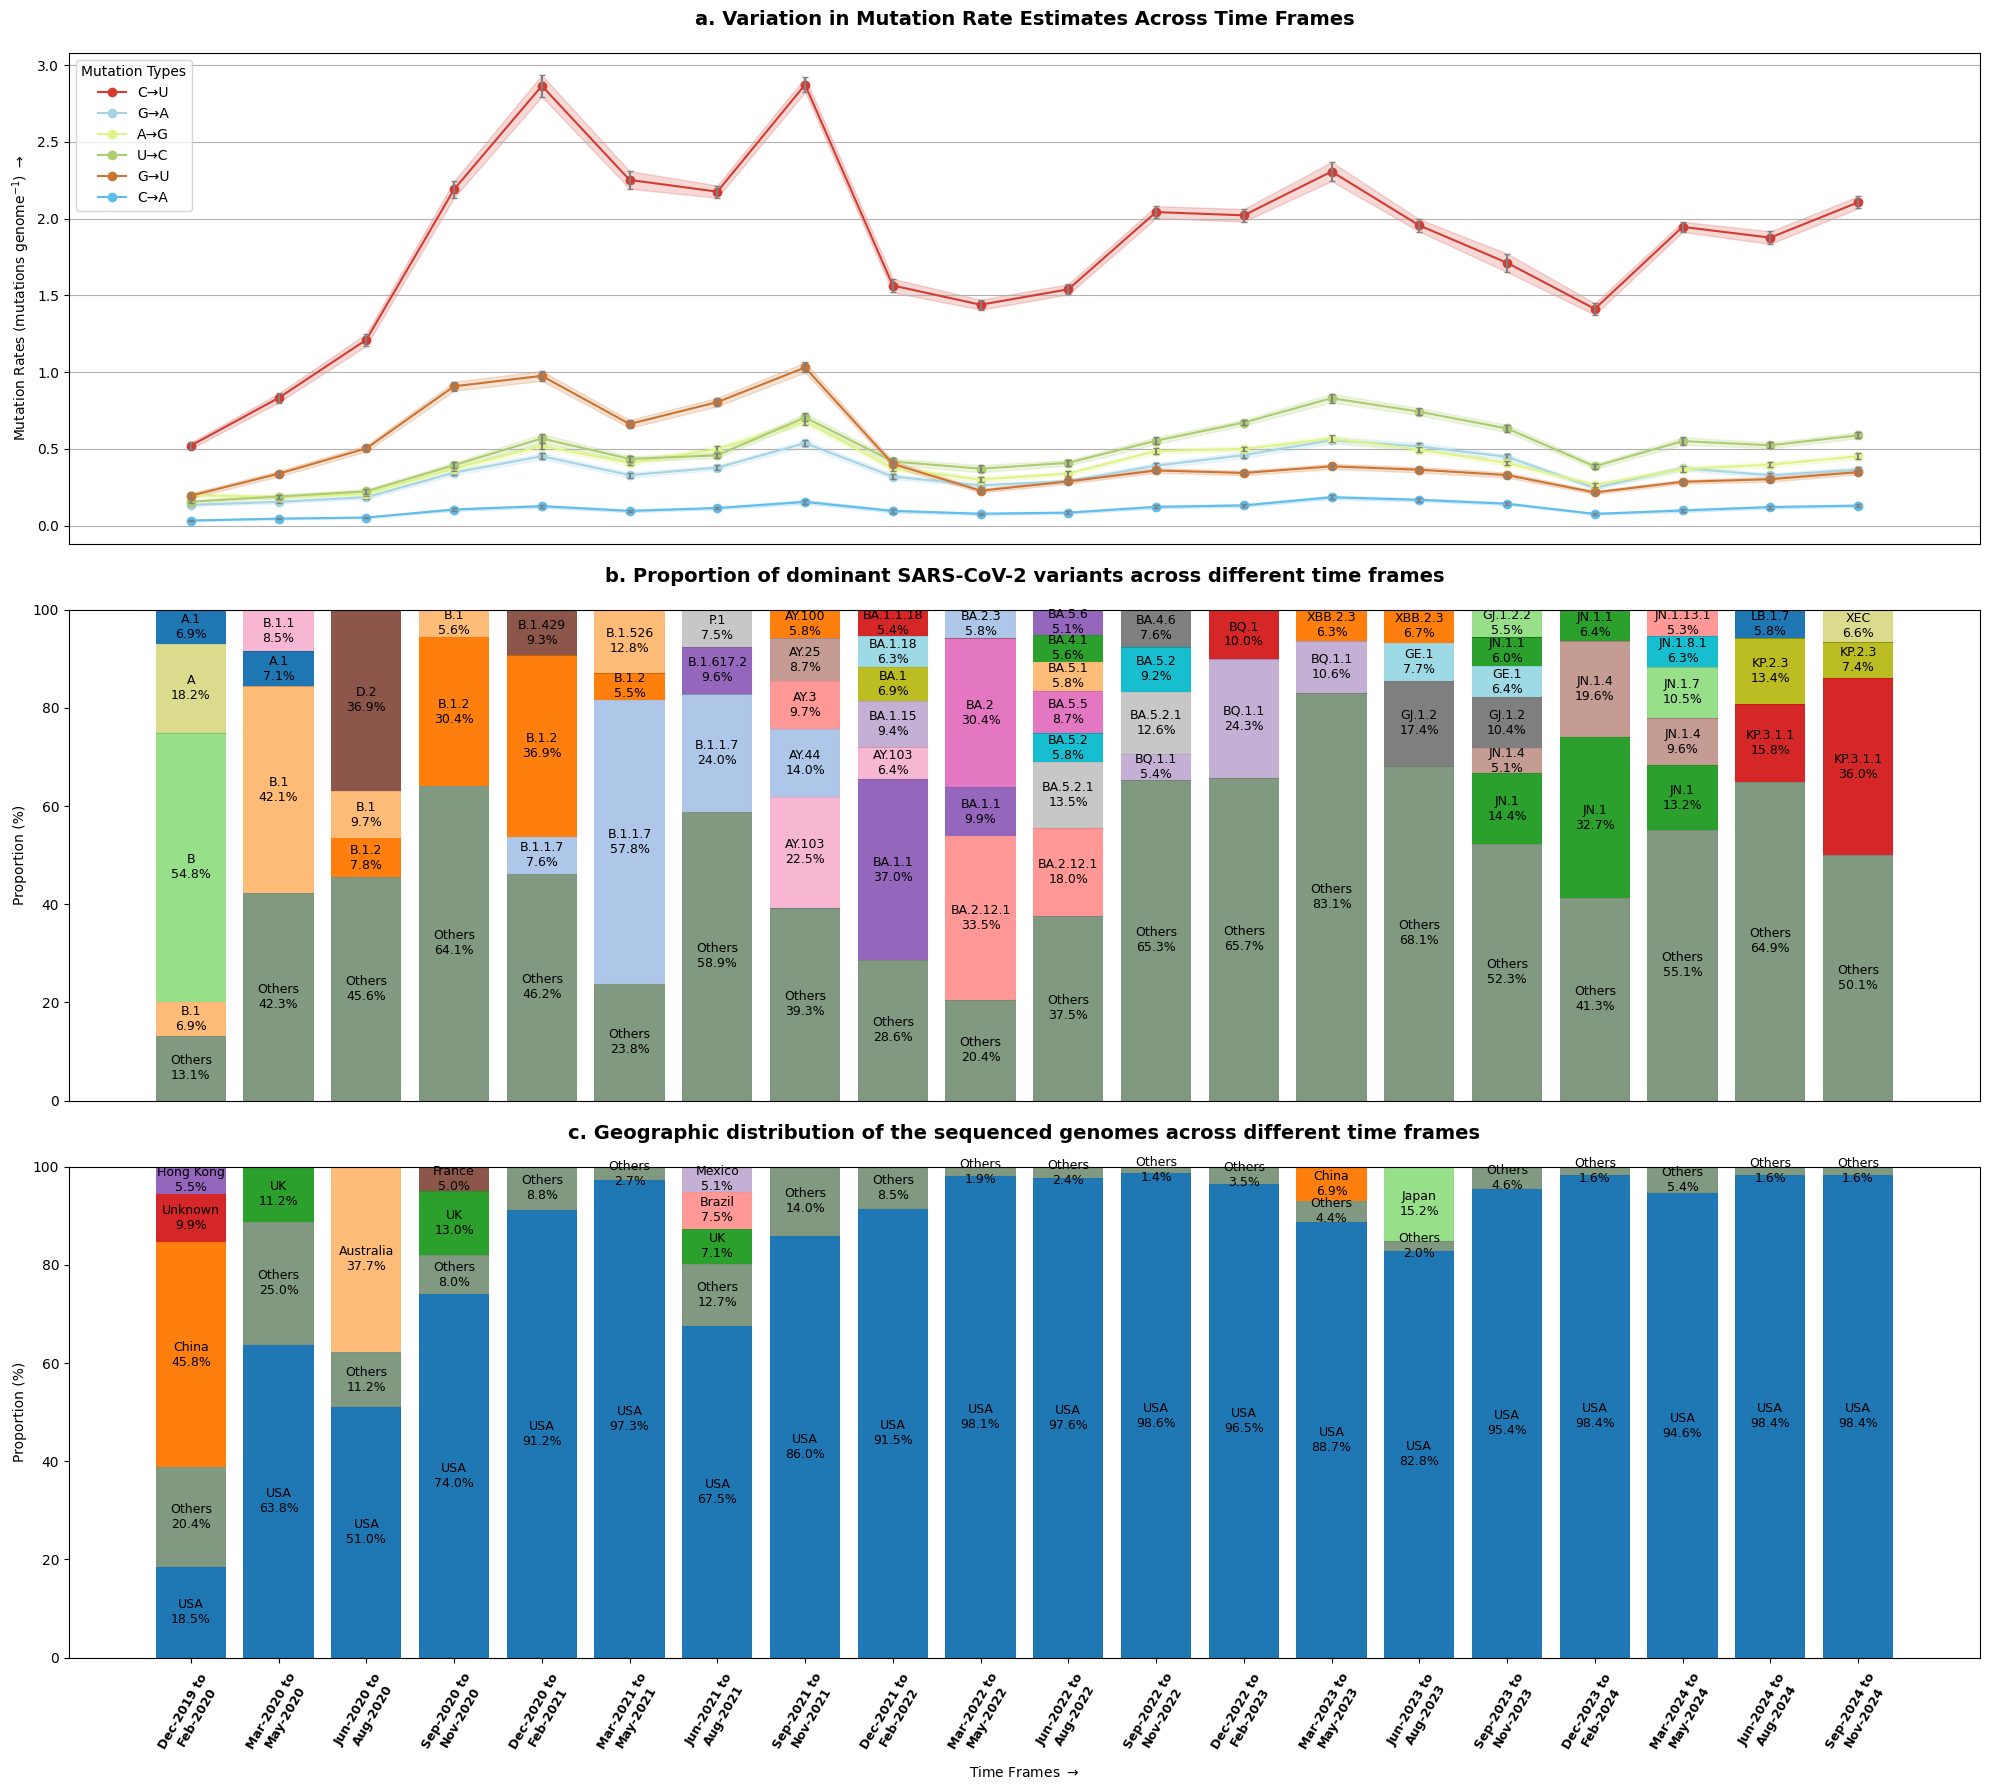

In [ ]:


def estimate_and_plot_single_nucleotide_mutation_rates_across_different_timeframes_alongwith_dominant_variants_and_geographic_locations(path_to_all_genomes_metadata, mutation_types, threshold_percentage):
    """Compute and plot the single nucleotide mutation rate estimates, along with the dominant variants and geolocation of the sequenced genomes across the different time frames 
    
        Parameters:
            - path_to_all_genomes_metadata (str): Path to the metadata file of all the genomes
            - mutation_types (list): The mutation types in which we are interested for plotting
            - threshold_percentage (int): Minimun threshold percentage to select a variant or geolocation as dominant. Those below the threshold_percentage will be grouped as "Others"
            - mutation_types (list): A list of all the mutation types whose values are to be computed
    """   

    colors=['#d33c33', '#a5d4e6', '#dff488', '#accc6f', '#cd7430', '#5fbceb']

    # Load the metadata file containing information about all the genomes
    all_genomes_metadata_df = pd.read_csv(path_to_all_genomes_metadata)

    # We extract the different time periods from the metadata and sort them based on the date
    time_periods=sorted(list(set(all_genomes_metadata_df[f"{n_months}_Month_Period"].to_list())))

    # -------------------
    # WE COMPUTE THE MUTATION RATE ESTIMATES OF THE DIFFERENT MUTATION TYPES ACROSS THE DIFFERENT TIMEFRAMES
    # -------------------
    
    confidence_level = 0.95 # Confidence level for estimation of mutation rates

    # Variables to store the mutation rate estimates per timeframe
    mean_mutation_rates_per_mutation = {mutation: [] for mutation in mutation_types}
    margin_of_errors = {mutation: [] for mutation in mutation_types}

    # Iterate through each timeframe
    for time_period in time_periods:
        # Iterate through each mutation types of interest
        for mutation in mutation_types:
            # Estimate the mutation rates        
            single_nucleotide_mutation_rates_for_this_mutation_type_and_time_period = [single_nucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period][mutation] for sample in single_nucleotide_mutation_rates_per_time_period_for_all_samples]
            mean_mutation_rate = np.mean(single_nucleotide_mutation_rates_for_this_mutation_type_and_time_period)
            std_mutation_rate=np.std(single_nucleotide_mutation_rates_for_this_mutation_type_and_time_period, ddof=1)
            n_samples=len(single_nucleotide_mutation_rates_for_this_mutation_type_and_time_period)
            # t-score for 95% CI
            t_score = stats.t.ppf((1 + confidence_level) / 2.0, n_samples - 1) 
            # Calculate margin of error
            margin_of_error = t_score * (np.array(std_mutation_rate) / np.sqrt(n_samples))

            # Store the computed values for plotting
            mean_mutation_rates_per_mutation[mutation].append(mean_mutation_rate)
            margin_of_errors[mutation].append(margin_of_error) 



    # -------------------
    # WE COMPUTE AND PLOT THE PROPORTION OF THE DOMINANT GEOLOCATION OF COLLECTION OF THE GENOMES SEQUENCED ACROSS THE DIFFERENT TIMEFRAMES
    # -------------------
    

    # Remove state information from the geolocation, retaining only the name of the country
    def get_country(x):
            if pd.isna(x):
                return "Unknown"
            if ":" in x:
                if (x.split(":")[0]=="United Kingdom"):
                    return "UK"
                else:
                    return x.split(":")[0]
            else:
                return x
    all_genomes_metadata_df["Geo_Location"] = all_genomes_metadata_df["Geo_Location"].apply(get_country)

    
    # Calculate geolocation counts
    geo_counts = all_genomes_metadata_df.groupby(['3_Month_Period', 'Geo_Location']).size().reset_index(name='Count')

    # Calculate proportions for Geo_Location
    total_counts_geo = geo_counts.groupby('3_Month_Period')['Count'].transform('sum')
    geo_counts['Proportion'] = (geo_counts['Count'] / total_counts_geo) * 100

    # Group less frequent Geo_Location as "Others"
    geo_counts['Geo_Location'] = geo_counts.apply(
        lambda row: row['Geo_Location'] if row['Proportion'] >= threshold_percentage else 'Others', axis=1
    )

    # Recompute the Geolocation proportions
    grouped_geo_counts = geo_counts.groupby(['3_Month_Period', 'Geo_Location']).sum(numeric_only=True).reset_index()
    total_counts_after_grouping_geo = grouped_geo_counts.groupby('3_Month_Period')['Count'].transform('sum')
    grouped_geo_counts['Proportion'] = (grouped_geo_counts['Count'] / total_counts_after_grouping_geo) * 100

    # Pivot the data for plotting
    plot_data_geo = grouped_geo_counts.pivot(index='3_Month_Period', columns='Geo_Location', values='Proportion').fillna(0)

    # Sort the columns based on the total proportions of the different Countries
    sorted_columns_geo = plot_data_geo.sum(axis=0).sort_values(ascending=False).index
    plot_data_geo = plot_data_geo[sorted_columns_geo]


    # Assign unique color to each Geolocation
    unique_geo_locations = plot_data_geo.columns
    palette_geo = sns.color_palette("tab20", len(unique_geo_locations))
    color_map_geo = dict(zip(unique_geo_locations, palette_geo))

    # For Others use a different colour
    if "Others" in unique_geo_locations:
        color_map_geo["Others"] = (0.5, 0.6, 0.5)  

    # Format the time periods for better readability
    time_periods = plot_data_geo.index.tolist()
    formatted_time_periods = []

    for time_period in time_periods:
        # Extract the start and end dates
        start_date_str, end_date_str = time_period.split('--')
        # Convert the date strings to datetime objects
        start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
        end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
        # Format the dates to "Month-YYYY"
        start_date_formatted = start_date.strftime("%b-%Y")
        end_date_formatted = end_date.strftime("%b-%Y")
        # Combine the formatted dates
        formatted_date_range = f"{start_date_formatted} to \n{end_date_formatted}"
        formatted_time_periods.append(formatted_date_range)

    # Plot the Dominant Geolocation stacked barplot 
    fig, axs = plt.subplots(3, 1, figsize=(20, 18), gridspec_kw={'height_ratios': [1, 1, 1]})
    
    bar_width = 0.8

    ax_geo = axs[2]

    # Compute the x and y positions for the stacked barplots 
    bottom_values_geo = pd.Series([0] * len(plot_data_geo), index=plot_data_geo.index)
    x_positions = np.arange(len(plot_data_geo.index))  # Base x-positions for bars

    # Plot the stacked barplot
    for geo_location, color in color_map_geo.items():
        bars_geo = ax_geo.bar(
            x_positions,  
            plot_data_geo[geo_location],
            color=color,
            edgecolor="black",
            linewidth=0.01,
            width=bar_width,
            bottom=bottom_values_geo
        )
        bottom_values_geo += plot_data_geo[geo_location]

        # Add labels at the center of the bar)
        for bar in bars_geo:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2  # Positioning the label at the center of the bar
            if height > 0:  # Only annotate non-zero bars
                ax_geo.text(
                    x, y,
                    f"{geo_location}\n{height:.1f}%",  # Label with category and percentage
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='black'
                )

    ax_geo.set_title('c. Geographic distribution of the sequenced genomes across different time frames', fontsize=14, fontweight="bold", pad=20)
    ax_geo.set_xlabel(r'Time Frames $\rightarrow$')

    ax_geo.set_ylabel('Proportion (%)')
    ax_geo.set_xticks(x_positions)
    ax_geo.set_xticklabels(formatted_time_periods, rotation=60, fontsize=9, ha='center', fontweight='bold')

   

    # -------------------
    # Subplot 2: Compute and Plot the Pangolin Bar Plot
    # -------------------
    
    ax_pangolin = axs[1]

    # Calculate variant count for Pangolin lineage and Geo_Location
    variant_counts = all_genomes_metadata_df.groupby(['3_Month_Period', 'Pangolin']).size().reset_index(name='Count')

    # Calculate proportions for Pangolin
    total_counts_pangolin = variant_counts.groupby('3_Month_Period')['Count'].transform('sum')
    variant_counts['Proportion'] = (variant_counts['Count'] / total_counts_pangolin) * 100

    # Group less frequent variants as "Others" (for Pangolin)
    variant_counts['Pangolin'] = variant_counts.apply(
        lambda row: row['Pangolin'] if row['Proportion'] >= threshold_percentage else 'Others', axis=1
    )
    
    # Recompute the variant proportions for Pangolin lineages
    grouped_variant_counts = variant_counts.groupby(['3_Month_Period', 'Pangolin']).sum(numeric_only=True).reset_index()
    total_counts_after_grouping = grouped_variant_counts.groupby('3_Month_Period')['Count'].transform('sum')
    grouped_variant_counts['Proportion'] = (grouped_variant_counts['Count'] / total_counts_after_grouping) * 100
    
    # Pivot the data for plotting Pangolin
    plot_data_pangolin = grouped_variant_counts.pivot(index='3_Month_Period', columns='Pangolin', values='Proportion').fillna(0)
    # Sort the data based on the overall more dominant variants
    sorted_columns_pangolin = plot_data_pangolin.sum(axis=0).sort_values(ascending=False).index
    plot_data_pangolin = plot_data_pangolin[sorted_columns_pangolin]

    # Assign Unique colour to each Pangolin
    unique_pangolins = plot_data_pangolin.columns
    palette_pangolin = sns.color_palette("tab20", len(unique_pangolins))
    color_map_pangolin = dict(zip(unique_pangolins, palette_pangolin))

    #  "Others" is depicted in a different color
    if "Others" in unique_pangolins:
        color_map_pangolin["Others"] = (0.5, 0.6, 0.5)  

    # Compute the x and y positions for the stacked barplots 
    bottom_values_pangolin = pd.Series([0] * len(plot_data_pangolin), index=plot_data_pangolin.index)
    x_positions = np.arange(len(plot_data_pangolin.index))  

    # Plot the stacked barplot
    for pangolin, color in color_map_pangolin.items():
        bars_pangolin = ax_pangolin.bar(
            x_positions,  # Use numerical positions
            plot_data_pangolin[pangolin],
            color=color,
            edgecolor="black",
            linewidth=0.01,
            width=bar_width,
            bottom=bottom_values_pangolin
        )
        bottom_values_pangolin += plot_data_pangolin[pangolin]

        # Record the bar centers for later use
        bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars_pangolin]
        
        # Add percentage labels on top of each bar (at the center of the bar)
        for bar in bars_pangolin:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2  # Positioning the label at the center of the bar
            if height > 0:  # Only annotate non-zero bars
                ax_pangolin.text(
                    x, y,
                    f"{pangolin}\n{height:.1f}%",  # Label with category and percentage
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='black'
                )

    ax_pangolin.set_title('b. Proportion of dominant SARS-CoV-2 variants across different time frames', fontsize=14, fontweight="bold", pad=20)
    ax_pangolin.set_ylabel('Proportion (%)')
    ax_pangolin.set_xticks([])


    # -------------------
    # Subplot 1: Dot Plot for Mutation Rate Estimates 
    # -------------------
    ax_dot = axs[0]

    # Plot the mutation rate estimates across different timeframes
    for i, mutation in enumerate(mutation_types):
        ax_dot.plot(
            bar_centers,  # Use bar centers for x-coordinates to align with bar centers
            mean_mutation_rates_per_mutation[mutation],
            marker='o',
            label=mutation.replace("T", "U").replace("->", "→"),
            color=colors[i]
        )
        ax_dot.fill_between(
            bar_centers,  # Align with bar centers
            np.array(mean_mutation_rates_per_mutation[mutation]) - np.array(margin_of_errors[mutation]),
            np.array(mean_mutation_rates_per_mutation[mutation]) + np.array(margin_of_errors[mutation]),
            alpha=0.2,
            color=colors[i]
        )
        ax_dot.errorbar(
            bar_centers,  # Align with bar centers
            mean_mutation_rates_per_mutation[mutation],
            yerr=margin_of_errors[mutation],
            fmt='none',
            capsize=2,
            color="grey"
        )

    ax_dot.set_title('a. Variation in Mutation Rate Estimates Across Time Frames', fontsize=14, fontweight='bold', pad=20)
    ax_dot.set_ylabel(r'Mutation Rates (mutations genome$^{{-1}}$) $\rightarrow$')
    ax_dot.set_xticks([])  # No x-ticks on the dot plot
    ax_dot.grid(True)

    # Add legend to the Dot Plot
    ax_dot.legend(title="Mutation Types", loc="upper left")

    # Sync X-Limits Across All Subplots
    for ax in axs:
        ax.set_xlim(ax_pangolin.get_xlim())  # Ensure consistent x-limits


    # Adjust horizonatl space between the subplots    
    plt.subplots_adjust(hspace=0.3)

    # Final layout adjustments
    plt.tight_layout()
    plt.show()


# Threshold for dominant Variant & Geolocatiom percentage
threshold_percentage = 5  # Variants and Geolocation below 5% will be grouped as "Others"

path_to_all_genomes_metadata='../SARS-CoV-2_genomes_metadata_filtered.csv' #Path to the metadata file contatining information on all the genomes
sorted_columns_pangolin=estimate_and_plot_single_nucleotide_mutation_rates_across_different_timeframes_alongwith_dominant_variants_and_geographic_locations(path_to_all_genomes_metadata, mutation_types, threshold_percentage)

/tmp/ipykernel_121174/392058609.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_count,col_count].set_xticklabels([f"{trinucleotide} ({str(Seq(trinucleotide).reverse_complement())})".replace("T","U") for trinucleotide in trinucleotide_mutation_rates], rotation=270)
/tmp/ipykernel_121174/392058609.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_count,col_count].set_xticklabels([f"{trinucleotide} ({str(Seq(trinucleotide).reverse_complement())})".replace("T","U") for trinucleotide in trinucleotide_mutation_rates], rotation=270)
/tmp/ipykernel_121174/392058609.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[row_count,col_count].set_xticklabels([f"{trinucleotide} ({str(Seq(trinucleotide).reverse_complement())}

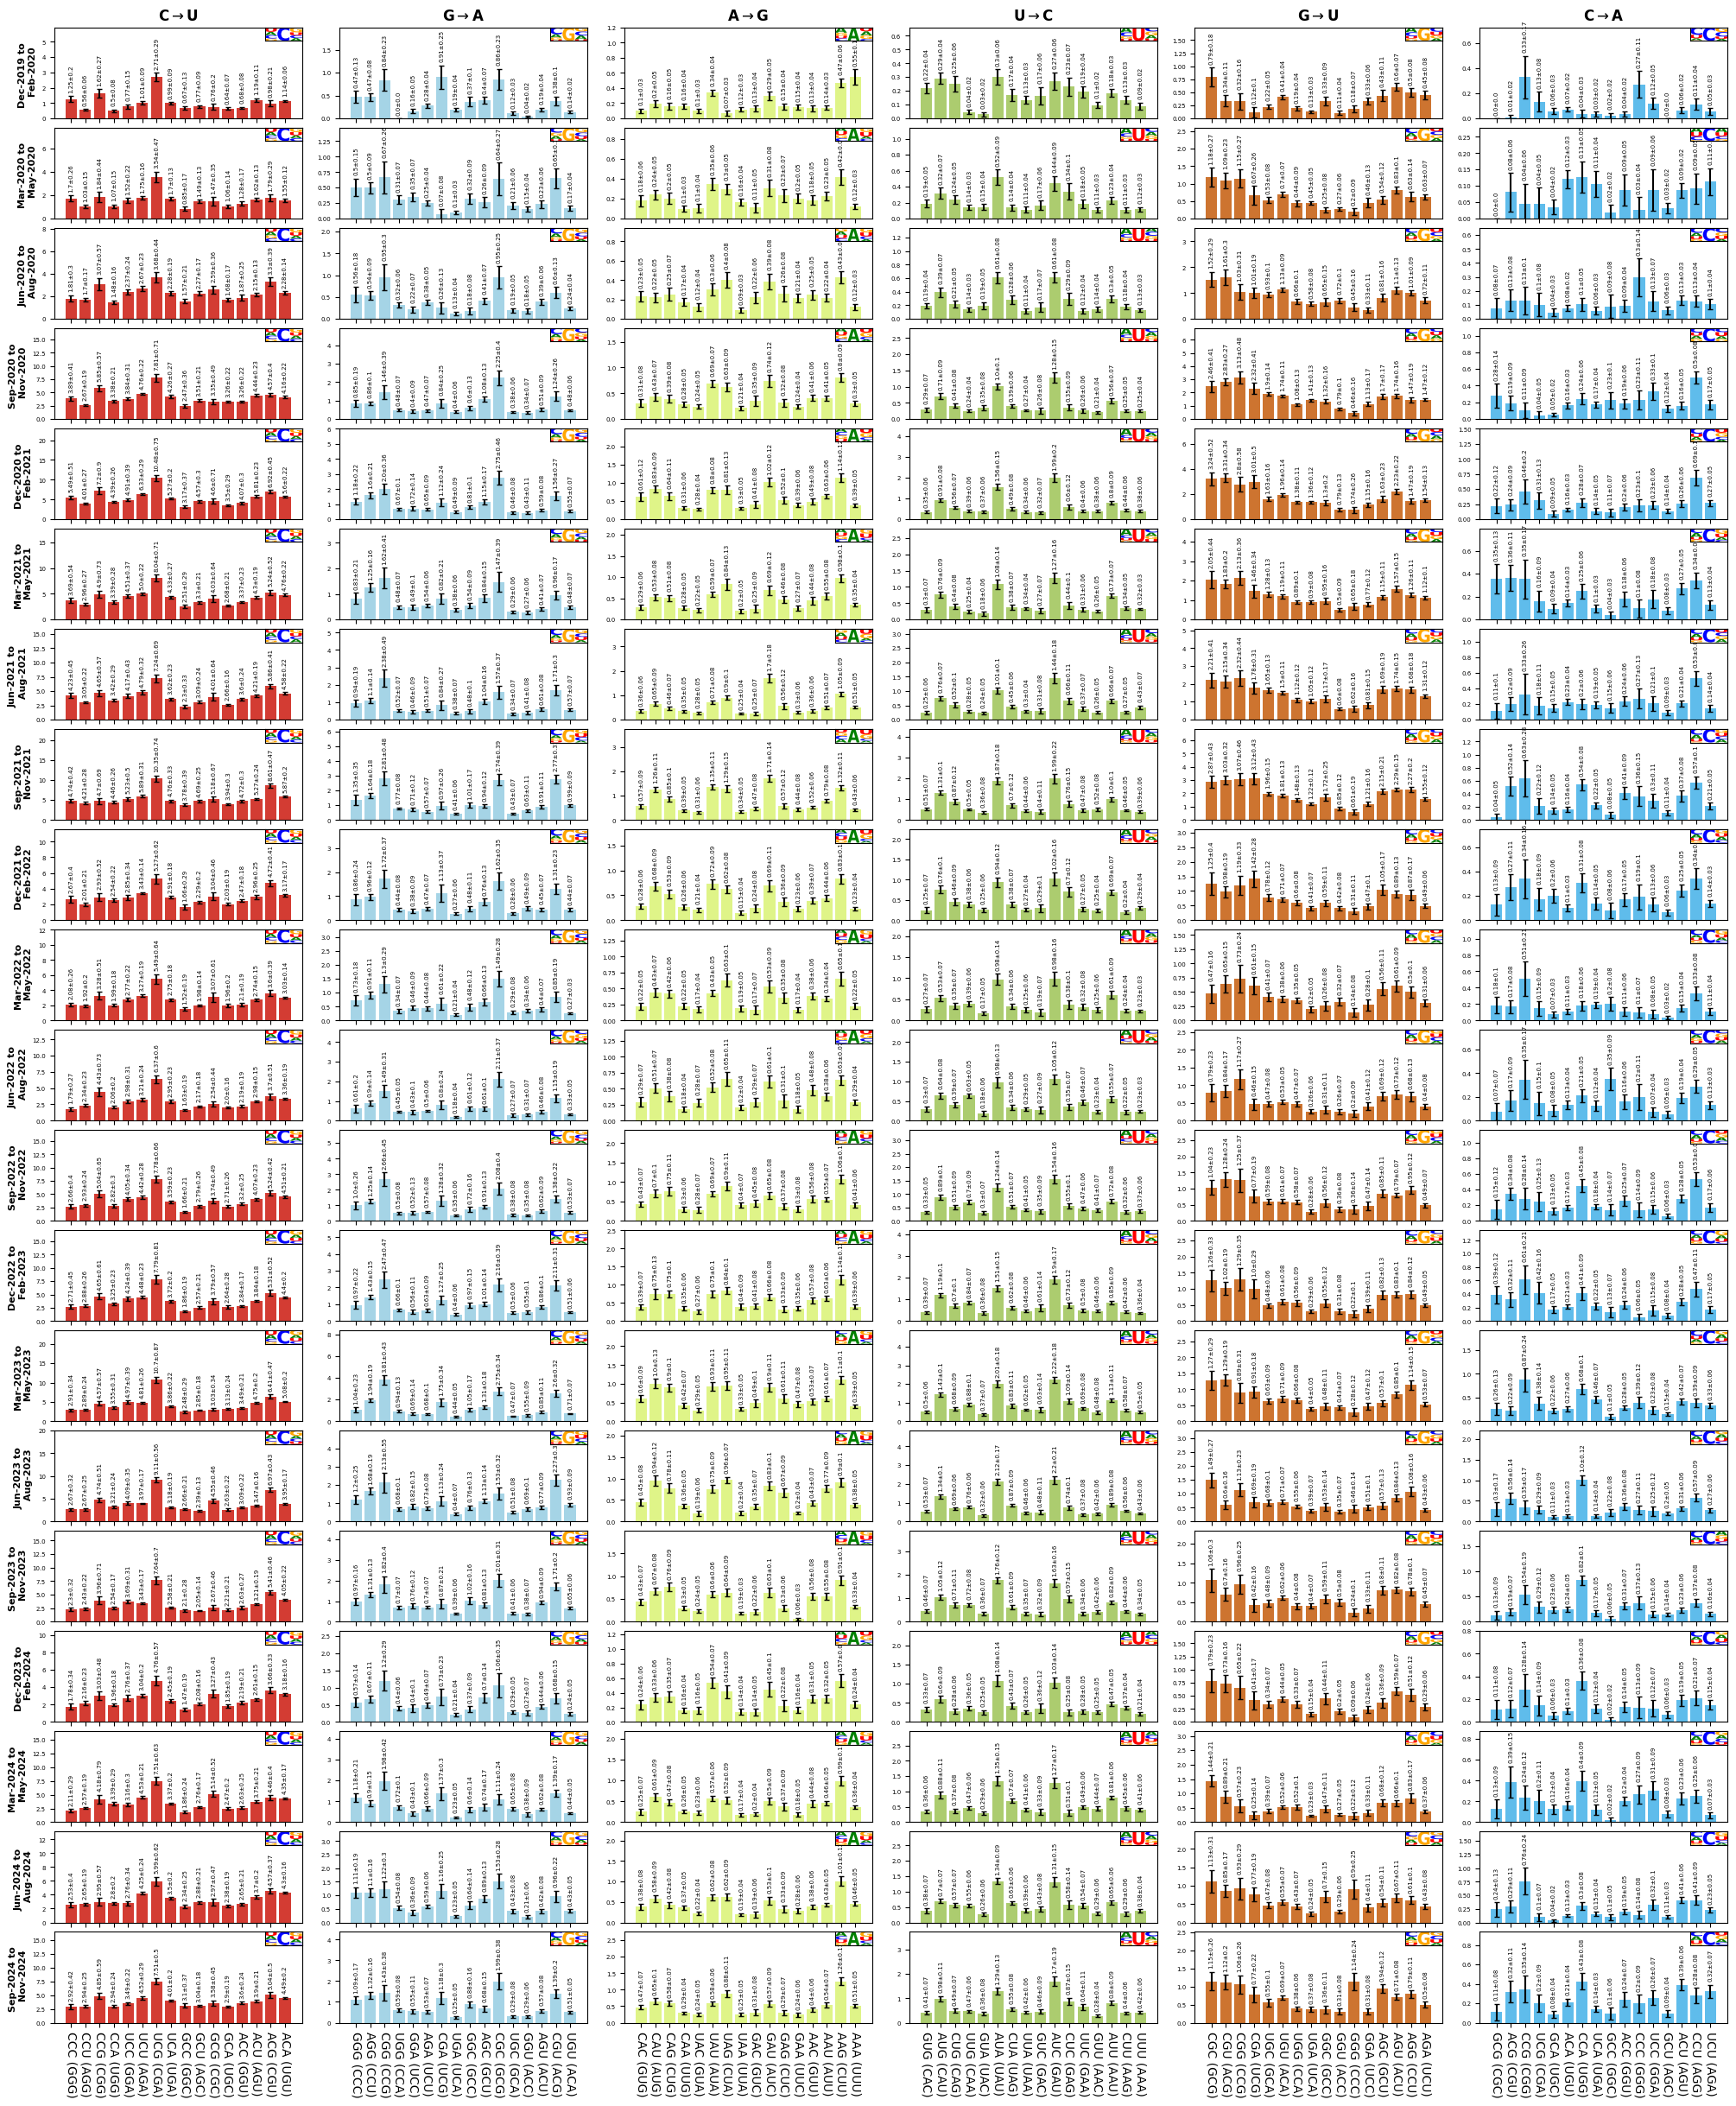

In [9]:

def estimate_and_plot_trinucleotide_mutation_rate_estimates_per_timeframe(trinucleotide_mutation_rates_per_time_period_for_all_samples, time_periods, n_samples):
    """
    Plot the Timewise Trinucleotide Mutation Rates for the Dominant Mutation types
    
    Parameters:
        - trinucleotide_mutation_rates_per_time_period_for_all_samples(dict) : Dictionary contatining Trinucleotide Mutation Rate information from all Samples accross the different timeframes
        - time_periods (list): List of the Different Time Frames
        - n_samples (int): No of Samples
    """

    # Scaling factor for better visualizing the values
    e=4

    # Confidence level for estimating the margin of error 
    confidence_level = 0.95

    #Colors assigned  for each mutation type
    colors=['#d33c33', '#a5d4e6', '#dff488', '#accc6f', '#cd7430', '#5fbceb']


    # List of all possible nucleotides and trinucleotides
    nucleotides=["C", "T", "G", "A"]   
    trinucleotide_list=['CCC', 'CCT', 'CCG', 'CCA', 'TCC', 'TCT', 'TCG', 'TCA', 'GCC', 'GCT', 'GCG', 'GCA', 'ACC', 'ACT', 'ACG', 'ACA', 'CTC', 'CTT', 'CTG', 'CTA', 'TTC',
                         'TTT', 'TTG', 'TTA', 'GTC', 'GTT', 'GTG', 'GTA', 'ATC', 'ATT', 'ATG', 'ATA', 'CGC', 'CGT', 'CGG', 'CGA', 'TGC', 'TGT', 'TGG', 'TGA', 'GGC', 'GGT',
                           'GGG', 'GGA', 'AGC', 'AGT', 'AGG', 'AGA', 'CAC', 'CAT', 'CAG', 'CAA', 'TAC', 'TAT', 'TAG', 'TAA', 'GAC', 'GAT', 'GAG', 'GAA', 'AAC', 'AAT', 'AAG', 'AAA']


    # FIRST, WE COMPUTE THE ESTIMATES OF THE TRINUCLEOTIDE MUTATION RATES FOR EACH TIME PERIOD FOR THE GIVEN MUTATION TYPES
    
    # Here, the rows are the time periods and the columns are the mutation types
    fig, ax = plt.subplots(len(time_periods),len(mutation_types), figsize=(25, 30))

    # We iterate through each mutation type
    for col_count, mutation_type in enumerate(mutation_types):
        
        # Get the colour assigned to this mutation type
        color=colors[col_count]

        # We iterate through each time period
        for row_count, time_period in enumerate(time_periods):
            # We create a dictionary that stores the trinucleotide mutation rates in such a way that it becomes easy to plot
            trinucleotide_mutation_rates={}
            for trinucleotide in trinucleotide_list:
                if(trinucleotide[1]==mutation_type[0]):   
                    for alternate_base in set(nucleotides) - {trinucleotide[1]}:
                        if(alternate_base==mutation_type[-1]):   
                            # Compute trinucleotide mutation rate estimates for this timeframe
                            mean_mutation_rate = np.mean([trinucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period][trinucleotide][alternate_base] for sample in trinucleotide_mutation_rates_per_time_period_for_all_samples])
                            std_mutation_rate = np.std([trinucleotide_mutation_rates_per_time_period_for_all_samples[sample][time_period][trinucleotide][alternate_base] for sample in trinucleotide_mutation_rates_per_time_period_for_all_samples], ddof=1)
                            # Calculate margin of error
                            t_score = stats.t.ppf((1 + confidence_level) / 2.0, np.array(n_samples) - 1)  # t-score for 95% CI
                            margin_of_error = t_score * (np.array(std_mutation_rate) / np.sqrt(n_samples))
                            # Store the values for plotting
                            trinucleotide_mutation_rates[trinucleotide]=[mean_mutation_rate, margin_of_error]



            # We sort the trinucleotide orders in the barplots based on a desired order
            if(col_count%2==0 and row_count==len(time_periods)-1):
                trinucleotide_order=[str(Seq(i).reverse_complement())  for i in list(trinucleotide_mutation_rates.keys())]
            if(col_count%2==1):
                trinucleotide_mutation_rates = OrderedDict((trinucleotide, trinucleotide_mutation_rates[trinucleotide]) for trinucleotide in trinucleotide_order)

            # NOW WE PLOT THE BARPLOTS DEPICTING THE TRINUCLEOTIDE MUTATION RATES
            trinucleotide_mutation_rates_bar_plot = ax[row_count,col_count].bar([f"{trinucleotide}_{str(Seq(trinucleotide).reverse_complement())}" for trinucleotide in trinucleotide_mutation_rates],
                            [trinucleotide_mutation_rates[trinucleotide][0]*10**e for trinucleotide in trinucleotide_mutation_rates],
                            color=color)
            
            # Add error bars for confidence intervals
            ax[row_count,col_count].errorbar([f"{trinucleotide}_{str(Seq(trinucleotide).reverse_complement())}" for trinucleotide in trinucleotide_mutation_rates],
                                            [trinucleotide_mutation_rates[trinucleotide][0]*10**e for trinucleotide in trinucleotide_mutation_rates],
                                            yerr=[trinucleotide_mutation_rates[trinucleotide][1]*10**e for trinucleotide in trinucleotide_mutation_rates],
                                            fmt='none',  capsize=2, color="black")



            # We change the time period format for better understanding
            
            # Split the date range into start and end dates
            start_date_str, end_date_str = time_period.split('--')
            # Convert the strings to datetime objects
            start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
            end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
            # Format the dates to "Month-YYYY"
            start_date_formatted = start_date.strftime("%b-%Y")
            end_date_formatted = end_date.strftime("%b-%Y")
            # Combine the formatted dates
            formatted_date_range = f"{start_date_formatted} to \n {end_date_formatted}"


            #Styling
            ax[row_count,0].set_ylabel(formatted_date_range, fontsize=8, fontweight='bold') 
            ax[0,col_count].set_title( mutation_type.replace("T","U").replace("->", r'$\rightarrow$'), fontweight='bold') 
            
            # Set y-tick label size
            ax[row_count,col_count].tick_params(axis='y', labelsize=5)  

            # Extend the space on the top for each subplot
            ax[row_count,col_count].set_ylim(0, 2.2*10**e*max(trinucleotide_mutation_rates[trinucleotide][0] for trinucleotide in trinucleotide_mutation_rates)) 
            
            # Display the x-ticks(trinucleotides) for the last row only
            ax[row_count,col_count].set_xticklabels([])
            if(row_count==len(time_periods)-1):
                ax[row_count,col_count].set_xticklabels([f"{trinucleotide} ({str(Seq(trinucleotide).reverse_complement())})".replace("T","U") for trinucleotide in trinucleotide_mutation_rates], rotation=270)



            #To add labels to the top of each bar
            def add_value_labels(ax, bars, counts, errors):
                    for bar, count, error in zip(bars, counts, errors):
                        height = bar.get_height() + error*10**e  # Adjust height to include the margin of error
                        ax.annotate(f'{round(count*10**e,2)}±{round(error*10**e,2)}',
                                    xy=(bar.get_x() + bar.get_width() / 2, height),
                                    xytext=(0, 3), 
                                    textcoords="offset points",
                                    ha='center', va='bottom', rotation=90, fontsize=5)

            # Add Trinucleotide Mutation rate value with error margin at the top of each bar in both plots
            add_value_labels(
                    ax[row_count,col_count], trinucleotide_mutation_rates_bar_plot, 
                    [trinucleotide_mutation_rates[trinucleotide][0] for trinucleotide in trinucleotide_mutation_rates],
                    [trinucleotide_mutation_rates[trinucleotide][1] for trinucleotide in trinucleotide_mutation_rates]
            )
            
            
            # NOW, WE COMPUTE AND ADD THE POSITION WEIGH MATRIX FROM THE TRINUCLEOTIDE MUTATION RATES

            #Initialize the Variable to store compute Position Weight Matrix(PWM) for the given mutation type
            pwm = np.zeros((3, 4))
            #Compute the Position Weight Matrix(PWM) for the given mutation type 
            for trinucleotide in trinucleotide_mutation_rates:
                rate=trinucleotide_mutation_rates[trinucleotide][0]
                if(rate>0):
                    for i in range(0, len(trinucleotide)):
                        if trinucleotide[i] == "A":
                            pwm[i, 0] += rate
                        elif trinucleotide[i] == "C":
                            pwm[i, 1] += rate
                        elif trinucleotide[i] == "G":
                            pwm[i, 2] += rate
                        elif trinucleotide[i] == "T":
                            pwm[i, 3] += rate

            #Normalize the PWM bases frequency at each position
            normalized_pwm = pwm / pwm.sum(axis=1, keepdims=True)
            # Create a DataFrame from the Normalized PWM         
            pwm_df = pd.DataFrame(normalized_pwm, index=[pos for pos in range(1, 4)], columns=["A", "C", "G", "U"])

            # Add the position weight matrix
            inset_ax = inset_axes(ax[row_count,col_count], width="15%", height="15%", loc='upper right', borderpad=0)
            logo_opposite_strand = logomaker.Logo(pwm_df, ax=inset_ax, shade_below=0.5, fade_below=0.5)
            # Remove x and y ticks
            logo_opposite_strand.ax.set_xticks([])
            logo_opposite_strand.ax.set_yticks([])

        
        # Adjust the space between the subplots
        fig.subplots_adjust(hspace=.1, wspace=.15)  


n_samples = 30
estimate_and_plot_trinucleotide_mutation_rate_estimates_per_timeframe(trinucleotide_mutation_rates_per_time_period_for_all_samples, time_periods,n_samples)


In [10]:
nucleotides = ["A", "T", "G", "C"]
for i in set(nucleotides)-{"A"}:
    print(i)


G
C
T
